<a href="https://colab.research.google.com/github/mmaruthi/TalentSprintPython-/blob/master/Py4AIML_Assignment_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas

In [0]:
from google.colab import files 
uploaded = files.upload()

### Exercise 1: Read the file into pandas dataframe

In [0]:
import pandas as pd 
import numpy as np 

df = pd.read_csv("samplemoviedata.csv")
df.head()

### Exercise 2: print the full summary of the dataframe

In [0]:
df.info()

In [0]:
df.isnull().any()

In [0]:
df.isnull().sum()

### Exercise 3: Remove information of the movie which doesn’t have information on when the movie came out

In [0]:
#title_year column has 108 null values. Let us remove those rows.

df1 = df.copy()

df = df.dropna(axis=0, how='any', subset=['title_year'])

In [0]:
df.isnull().title_year.sum()

In [0]:
df.shape

As we removed 108 rows - now rows reduced to 4935. So , we are good

### Exercise 4: Change all movie titles to uppercase

In [0]:
df.columns

In [0]:
df['movie_title'] = df['movie_title'].str.upper()

df['movie_title'].head()

### Exercise 5: Remove the movie titles trailing whitespaces

In [0]:
df['movie_title'] = df['movie_title'].str.strip()

df['movie_title'].head(10)

In [0]:
# Let us see how many movies are released each year 

import matplotlib.pyplot as plt 
import seaborn as sns 

movie_yearly_count = df['title_year'].value_counts().sort_index().plot(kind='bar', color='r', alpha=0.5, grid=False, rot=100)

movie_yearly_count.set_ylabel('Year')
movie_yearly_count.set_xlabel('Movie Count')
movie_yearly_count.set_title('Movie Count by Year')



In [0]:
# Let us get the list of unique genres 

unique_genres = df['genres'].unique()

unique_genres


In [0]:
import itertools 

individual_genres = []
for genre in unique_genres:
    individual_genres.append(genre.split('|'))
    #individual_genres.append(genre.split(','))

individual_genres = list(itertools.chain.from_iterable(individual_genres))
individual_genres = set(individual_genres)

individual_genres

Number of movies in each genre: 

Animation 235
News 3
Biography 291
History 204
Drama 2518
Action 1134
Western 97
Crime 857
Fantasy 595
Music 325
Adventure 913
Thriller 1383
Short 5
War 209
Romance 1090
Family 535
Mystery 475
Comedy 1835
Sport 181
Film-Noir 6
Sci-Fi 599
Documentary 119


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_

Musical 132
Horror 558


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


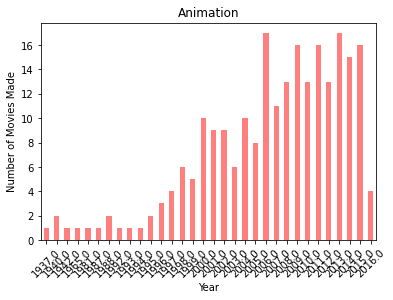

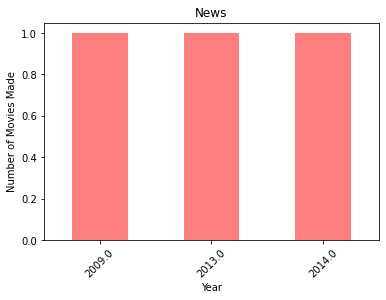

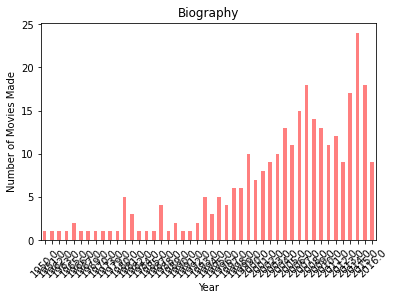

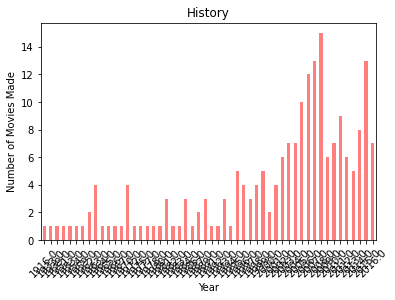

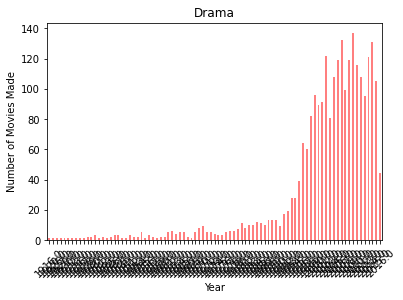

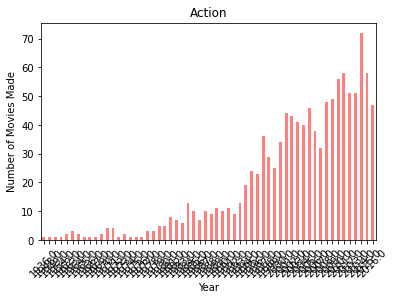

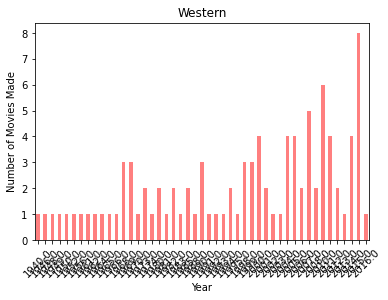

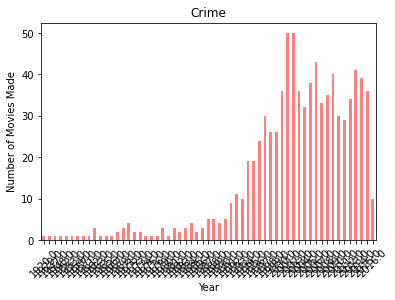

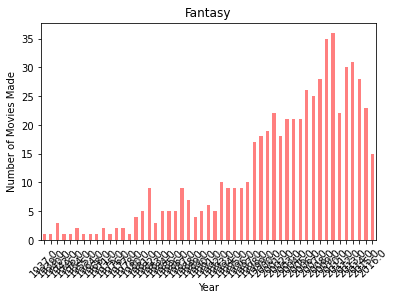

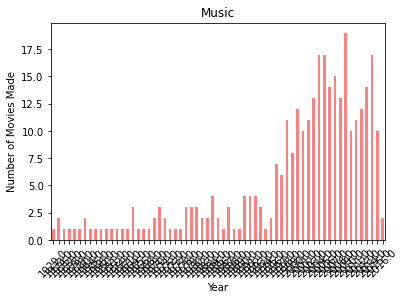

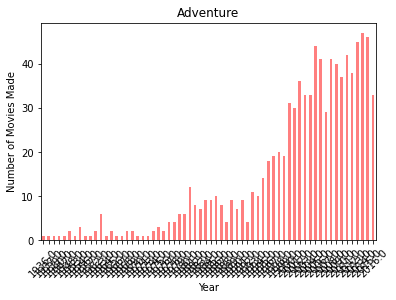

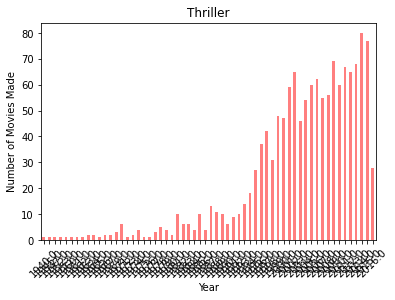

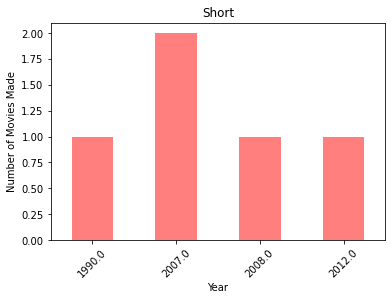

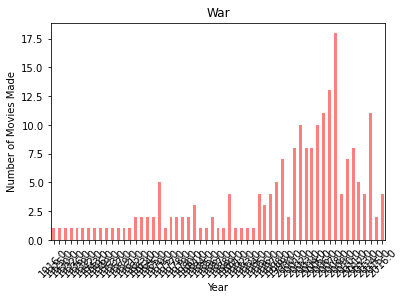

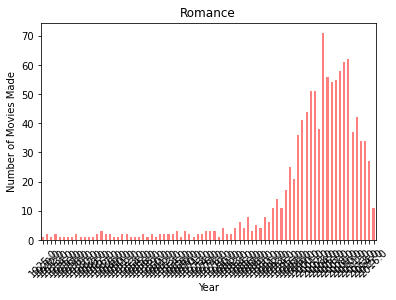

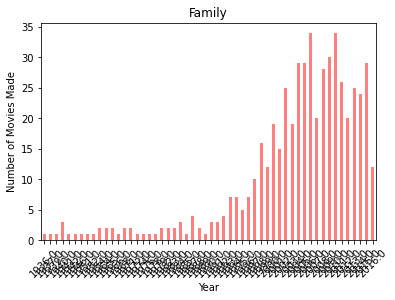

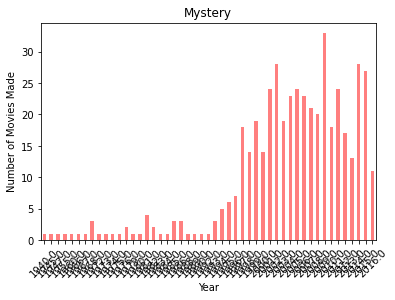

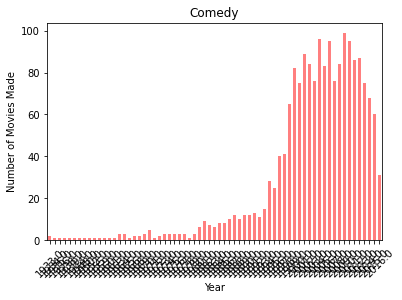

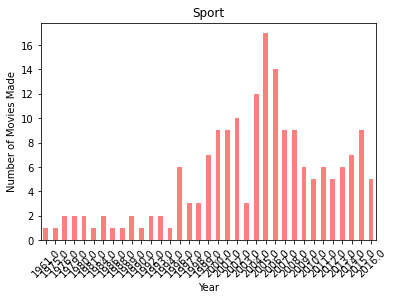

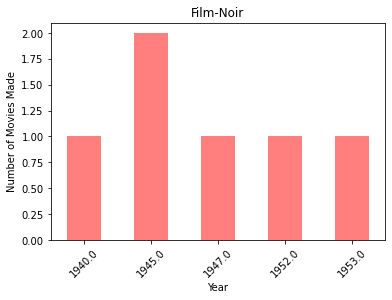

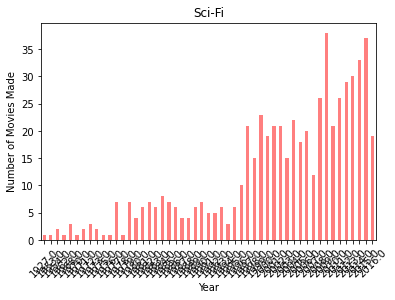

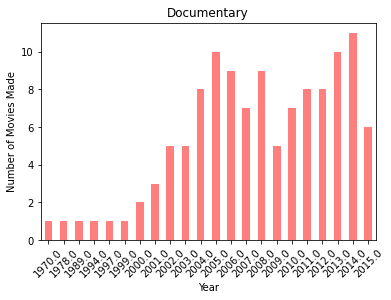

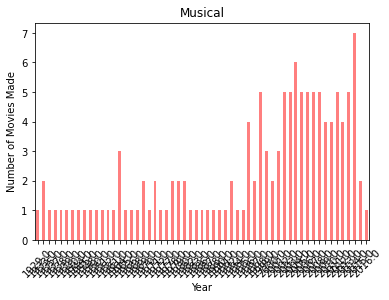

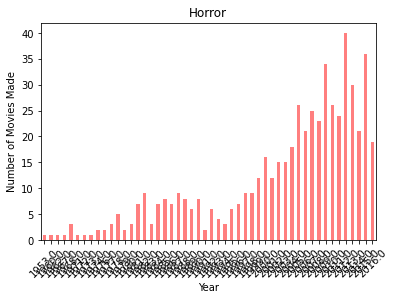

In [20]:
print('Number of movies in each genre: \n')

for genre in individual_genres:
    current_genre = df['genres'].str.contains(genre).fillna(False)
    plt.figure()
    plt.xlabel('Year')
    plt.ylabel('Number of Movies Made')
    plt.title(str(genre))
    df[current_genre].title_year.value_counts().sort_index().plot(kind='bar', color='r', alpha=0.5, rot=45)
    print(genre, len(df[current_genre]))